$${\Huge \textbf{Практическое задание по ОММ}}
$$



$${\Huge \textbf{Вариант 1}}
$$



$${\Huge \textbf{Автор: Корнев Артем, гр 329}}
$$
$${\Huge \textbf{Постановка задачи:}}
$$



Используя метод переменных направлений, решить краевую задачу: 



$$\begin{cases}
 \frac{\partial u}{\partial t} = 4\Delta u, \quad 0 < x < 10, \quad 0 < y < 5, \quad t > 0 \\
 u|_{x=0} = u|_{x=10} = 0 \\
 \frac{\partial u}{\partial y}|_{y=0} = \frac{\partial u}{\partial x}|_{y=5} = 0 \\
 u|_{t=0} = \sin(\pi x)\cos(2\pi y)
\end{cases}
$$

$${\Huge \textbf{Аналитическое решение задачи}}
$$
Поставленная задача линейна и однородна, поэтому сумма частных реше-
ний - решение задачи. Тогда решение задачи будем искать в виде:
$$
u(x,y,t) = \sum_{m=0}^{\infty} \sum_{n=0}^{\infty}
 V_{mn}(x,y)T_{mn}(t)
$$
Тогда в результате разделения переменных получим, что явный вид функций $V_{mn}(x,y)$ и $T_{mn}(t)$ определяется из решений соответствующей задачи Штурма-Лиувилля и задачи Коши:



$$\begin{equation}
\left\{
\begin{aligned}
& \Delta V + \lambda V = 0 \\
& V|_{x=0} = V|_{x=10} = 0 \\
& \frac{\partial V}{\partial y}|_{y=0} = \frac{\partial V}{\partial x}|_{y=5} = 0
\end{aligned}
\right.
\tag{1}
\end{equation}
$$


$$\begin{equation}
\left\{
\begin{aligned}
& T' + \lambda T = 0 \\
& T(0) = \sin(\pi x)\cos(2\pi y)
\end{aligned}
\right.
\tag{2}
\end{equation}
$$

Решая соответствующие задачи получаем $u(x,y,t) = \sin(\pi x)\cos(2\pi y)\mathrm{e}^{-20\pi^2 t}
$

Видно, что из-за экспоненциального множителя, перенос тепла со временем будет уменьшаться, но форма графика не будет изменяться, так как она определяется синусом и косинусом. Ниже построен объемный график аналитического решения в момент времени t=0.01c.


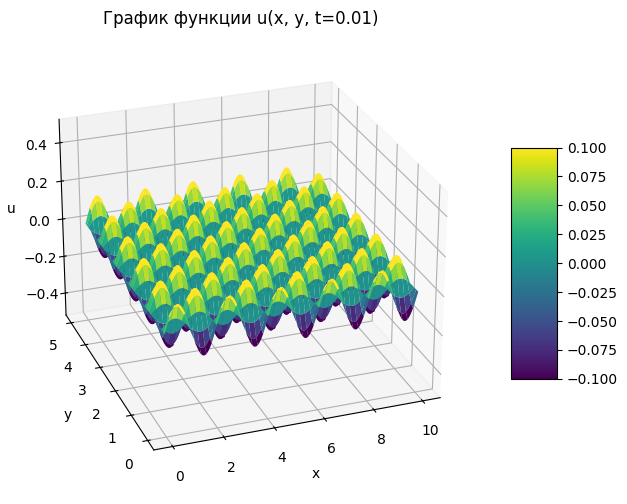

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создание сетки значений x и y
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 5, 500)

# Создание сетки значений x и y
X, Y = np.meshgrid(x, y)

# Задание значения времени t
t = 0.01

# Вычисление значения функции u(x, y, t)
u = np.sin(np.pi * X) * np.cos(2 * np.pi * Y) * np.exp(-20 * np.pi**2 * t)

# Задание диапазона значений для u
u_min = -0.5
u_max = 0.5

# Построение трехмерного графика с увеличенными размерами
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u, cmap='viridis')

# Установка диапазона значений цветовой шкалы
surf.set_clim(-0.1, 0.1)
ax.set_zlim(u_min, u_max)

# Настройка положения камеры
ax.view_init(26, -110)

# Добавление цветовой шкалы
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Добавление подписей к осям
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('График функции u(x, y, t=0.01)')
plt.show()


$${\Huge \textbf{Численное решение задачи}}
$$

$${\Huge \textbf{Построение разностной сетки}}
$$

Введем сетку в области определения $\Omega$ = {(x, y); 0 < x < 10, 0 < y < 5} $\otimes [0, T]$:

$$\begin{cases}
 \overline{w_h} = \{(x, y): x_{i} = ih_x, i = 0 ... N_x, h_x N_x = 10; y_{j} = jh_y, j = 0 ... N_y, h_y N_y = 5\} \\
 \overline{w_\tau} = \{t_k = k\tau, k = 0 ... N_\tau, \tau N_\tau = T\} \\
 \overline{w_{h\tau}} = \overline{w_h} \otimes \overline{w_\tau}
\end{cases}
$$


На введенной сетке будем рассматривать сеточные функции $w_{i,j}^{k}$

Оператор Лапласа аппроксимируем разностным оператором $\Lambda w = \Lambda_1 w + \Lambda_2 w$

Где

$$\Lambda_1 w = \frac{w_{i-1,j} - 2w_{i,j} + w_{i+1,j}}{h_x^2}, \quad
\Lambda_2 w = \frac{w_{i,j-1} - 2w_{i,j} + w_{i,j+1}}{h_y^2}$$

Тогда уравнение сеточной функции:

$$\frac{w^{k+1} - w^k}{\tau} = \Lambda (\sigma w^{k+1}+(1 - \sigma)w^k)
$$
Начальные и граничные условия:

$$\begin{cases}
 w_{i,j}^{0} = \sin(\pi x)\cos(2\pi y) \\
 \frac{w_{i,1} - w_{i,0}}{h_y} = 0 \\
 \frac{w_{i,N_y} - w_{i,N_y - 1}}{h_y} = 0 \\
 w_{0,j} = 0\\
 w_{N_x,j} = 0
\end{cases}
$$

Для всех $i=0,\ldots,N_x, \, j=0,\ldots,N_y$


$${\Huge \textbf{Метод переменных направлений}}
$$


В схеме переменных направлений переход со слоя на слой осуществляется в два шага, с помощью вычисления промежуточного слоя. Разностная аппроксимация уравнения имеет вид:

$$\frac{w^{k+0.5} - w^k}{0.5\tau} = \Lambda_1 w^{k+0.5} + \Lambda_2 w^{k}$$
$$\frac{w^{k+1} - w^{k+0.5}}{0.5\tau} = \Lambda_1 w^{k+0.5} + \Lambda_2 w^{k+1}$$

Переход от слоя k к слою k+1 совершается в два этапа с шагом  $\tau/2$: сначала решается уравнение, являющееся неявным по направлению х и явным по направлению у, а затем уравнение, которое является явным по направлению х и неявным по направлению y. При решении в обоих случаях используется метод прогонки. Значение сеточной функции на промежуточном слое играет вспомогательную роль. 

Чтобы определить $w^{k+1/2}$ решим методом прогонки разностную задачу:

$$\frac{0.5\tau}{h_x^2}w_{i+1,j}^{k+1/2} - (1+\frac{\tau}{h_x^2})w_{i,j}^{k+1/2}+\frac{0.5\tau}{h_x^2}w_{i-1,j}^{k+1/2} =-F_{i,j}^{k+0.5}$$

В более удобном виде:

$$A_1w_{i+1,j}^{k+1/2}- B_1w_{i,j}^{k+1/2}+ C_1w_{i-1,j}^{k+1/2} = -F_1$$

$$\begin{cases}
 A_1=C_1= \frac{0.5\tau}{h_x^2}\\
 B_1 =  1+\frac{\tau}{h_x^2}\\
 F_1 = w_{i,j}^k + \frac{0.5\tau}{h_x^2}(w_{i-1,j}^{k} + w_{i+1,j}^{k} - 2w_{i,j}^{k})
\end{cases}
$$


Если известны все значения $w^{k+1/2}$, то можно совершить переход со слоя k+1/2 на k+1:


$$A_2w_{i+1,j}^{k+1}- B_2w_{i,j}^{k+1}+ C_2w_{i-1,j}^{k+1} = -F_2$$

$$\begin{cases}
 A_2=C_2= \frac{0.5\tau}{h_y^2}\\
 B_1 =  1+\frac{\tau}{h_y^2}\\
 F_1 = w_{i,j}^{k+0.5} + \frac{0.5\tau}{h_x^2}(w_{i-1,j}^{k+0.5} + w_{i+1,j}^{k+0.5} - 2w_{i,j}^{k+0.5})
\end{cases}
$$

$${\Huge \textbf{Метод прогонки}}
$$
Решается система уравнений:

$$\begin{cases}
 Ay_{n+1} − Cy_n + By_{n−1} = −F_n, 1 < n < N − 1\\
 y_0=κ_1y_1+μ_1 \\
 y_N =κ_2y_{N−1}+μ_2\\
\end{cases}
$$
$y_n = α_{n+1}y_{n+1} + β_{n+1}$

После подстановки решения в уравнение получим рекурентные формулы для $α_{n+1}, β_{n+1}$:

$$α_{n+1} = \frac{B}{C - Aα_{n}}$$

$$β_{n+1} = \frac{Aβ_{n}-F_n}{C - Aα_{n}}$$

n = 1, 2, ..., N − 1

Из граничных условий:

$$x:x0 =κ_1x_1 +μ_1 =0⇒α_1 =κ_1 =0,β_1 =μ_1 =0$$

$$y:y0 =κ_1y_1+μ_1 =y_1 ⇒α_1 =κ_1 =1,β_1 =μ_1 =0$$

Прямой ход прогонки - вычисление коэффициентов $α_{n+1}, β_{n+1}$ по известным $α_1, β_1$. Из вторых граничных условий:

$$x:xN =κ_2x_{N−1}+μ_2=0⇒κ_2=0,μ_2=0$$

$$y:yN =κ_2y_{N−1}+μ_2=0⇒κ_2=1,μ_2=0$$

Тогда:

$$y_N= \frac{κ_2β_N+μ_2}{1-α_nκ_2}$$

Обратный ход прогонки - по известному $y_N$ и коэффициентам $α_n, β_n$ вычисляем $y_n$ по формуле:

$$y_n =α_{n+1}y_{n+1}+β_{n+1}, n=1,2,...,N−1$$

Достаточные условия устойчивости:

$$|C_i| = 1 + \frac{τ}{h_i^2} , A_i = B_i = \frac{0.5τ}{h_i^2} , i = 1, 2$$

$$\frac{0.5τ}{h_i^2} + \frac{0.5τ}{h_i^2}≤1 + \frac{τ}{h_i^2}$$


$$x : |κ1| = |κ2| = 0 ≤ 1, 0 + 0 ≤ 2$$

$$y : |κ1| = |κ2| = 1 ≤ 1, 1 + 1 ≤ 2$$

Порядок аппроксимации Разложим разностный оператор $Λ_1$ в ряд Тейлора:

$$\frac{w_{i-1,j}^{k} + w_{i+1,j}^{k} - 2w_{i,j}^{k}}{h_x^2} = \frac{1}{h_x^2}(h_x^2w_{i,j}^{k(2)}+\frac{h_x^4}{12}w_{i,j}^{k(4)})∼ O(h_x^2)$$

Аналогично для $Λ_2$:

$$\frac{w_{i-1,j}^{k} + w_{i+1,j}^{k} - 2w_{i,j}^{k}}{h_y^2} = \frac{1}{h_y^2}(h_y^2w_{i,j}^{k(2)}+\frac{h_y^4}{12}w_{i,j}^{k(4)})∼ O(h_y^2)$$

Следовательно, порядок аппроксимации по пространственным компонентам равен $O(|h|^2)$. 
Найдем порядок аппроксимации по временной части. Разложим в ряд Тейлора до соответствующих порядков производные по времени.

$$\begin{cases}
 w^{k+1} = w^{k+1/2} + \frac{τ}{2} w_t^{k+1/2} + \frac{τ^2}{8} w_{tt}^{k+1/2} + \frac{τ^3}{16} w_{ttt}^{k+1/2} + O(τ^4)\\
 w^{k} = w^{k+1/2} - \frac{τ}{2} w_t^{k+1/2} + \frac{τ^2}{8} w_{tt}^{k+1/2} - \frac{τ^3}{16} w_{ttt}^{k+1/2} + O(τ^4)
\end{cases}
$$

Тогда в точке $t^{k+1/2}$ аппроксимация производной по времени будет выглядеть:

$$\frac{w^{k+1} - w^{k}}{\tau} = \frac{1}{\tau}(\tau w_t^{k+1/2}+\frac{τ^3}{24} w_{ttt}^{k+1/2} +O(τ^4))$$

Таким образом, невязка равна $O(|h|^2 + τ^2)$, значит порядок аппроксимации
по координатам и времени равен 2.

$${\Huge \textbf{Устойчивость}}
$$
Устойчивость схемы по начальным данным будем оценивать с помощью спектрального метода Неймана. Ищем решение в виде:
$$w_{i,j}^{k} = \lambda^{k}_1e^{i(α_i+β_i)}_1$$

Подставим решение в разностное уравнение и получим:

$$\sqrt(λ^{k}_1) = \frac{1 − \frac{2τ}{h_y^2} sin^2(β/2)}{{1+ \frac{2τ}{h_x^2} sin^2(α/2)}} <1  \:∀τ,h_x,h_y,α,β$$

Аналогично:

$$\sqrt(λ^{k}_2) = \frac{1 − \frac{2τ}{h_x^2} sin^2(α/2)}{{1+ \frac{2τ}{h_y^2} sin^2(β/2)}} <1  \:∀τ,h_x,h_y,α,β$$

Значит для каждого из уравнений выполняется критерий Неймана. А из $$|λ_1λ_2| < 1 \:∀τ,h_x,h_y,α,β $$следует, что он выполняется и при переходе с k-ого слоя на k+1-ый. Отсюда мы получаем, что схема переменных направлений безусловна устойчива.


$${\Huge \textbf{Программа и результаты}}
$$

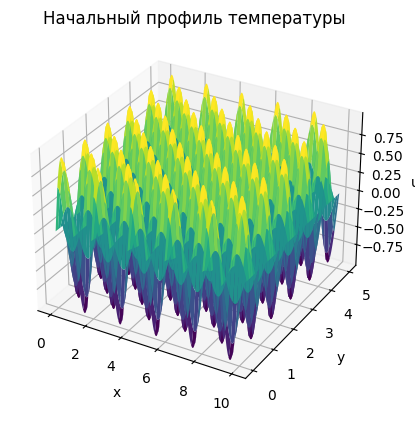

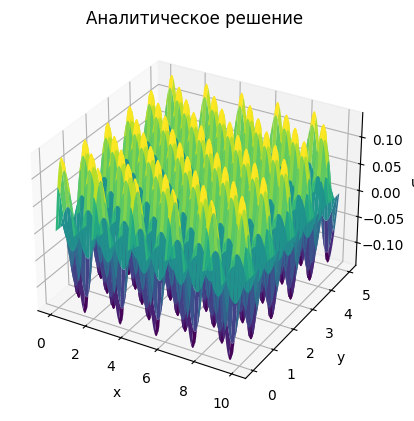

Iteration 1/200
Iteration 2/200
Iteration 3/200
Iteration 4/200
Iteration 5/200
Iteration 6/200
Iteration 7/200
Iteration 8/200
Iteration 9/200
Iteration 10/200
Iteration 11/200
Iteration 12/200
Iteration 13/200
Iteration 14/200
Iteration 15/200
Iteration 16/200
Iteration 17/200
Iteration 18/200
Iteration 19/200
Iteration 20/200
Iteration 21/200
Iteration 22/200
Iteration 23/200
Iteration 24/200
Iteration 25/200
Iteration 26/200
Iteration 27/200
Iteration 28/200
Iteration 29/200
Iteration 30/200
Iteration 31/200
Iteration 32/200
Iteration 33/200
Iteration 34/200
Iteration 35/200
Iteration 36/200
Iteration 37/200
Iteration 38/200
Iteration 39/200
Iteration 40/200
Iteration 41/200
Iteration 42/200
Iteration 43/200
Iteration 44/200
Iteration 45/200
Iteration 46/200
Iteration 47/200
Iteration 48/200
Iteration 49/200
Iteration 50/200
Iteration 51/200
Iteration 52/200
Iteration 53/200
Iteration 54/200
Iteration 55/200
Iteration 56/200
Iteration 57/200
Iteration 58/200
Iteration 59/200
Iterat

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# создаем сетку
x0, xN = 0, 10
y0, yN = 0, 5
t0, tN = 0, 0.01

# количество узлов
N1, N2, Nt = 500, 500, 200

# шаги сетки
h1 = (xN - x0) / (N1 - 1)
h2 = (yN - y0) / (N2 - 1)
tau = (tN - t0) / (Nt - 1)

# одномерные сетки
x_grid = np.linspace(x0, xN, N1)
y_grid = np.linspace(y0, yN, N2)
t_grid = np.linspace(t0, tN, Nt)

# сетки для вывода u(x, y) при t = const
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

# сетки для вывода u(y, t) при x = 5 = const
y_mesh_x, t_mesh_x = np.meshgrid(y_grid, t_grid)

# массив для сохранения профиля u(y, t)
u_x = np.zeros((N2, Nt))

# задаем начальное условие
u0 = np.sin(np.pi * x_mesh) * np.cos(2 * np.pi * y_mesh)

# вывод аналитического решения
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(x_mesh, y_mesh, u0, cmap='viridis')
ax1.set_title('Начальный профиль температуры')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('u')
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(x_mesh, y_mesh, u0 * np.exp(-20 * np.pi * np.pi * tN), cmap='viridis')
ax2.set_title('Аналитическое решение')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('u')
plt.show()

# реализация метода прогонки
u_j = u0.copy()  # начальное условие
u_half = np.zeros((N2, N1))  # половинный слой - граничные условия выполняются автоматически
u_j1 = np.zeros((N2, N1))  # следующий слой
d_y = np.zeros(N2 + 1)  # векторы прогоночных коэффициентов по y
sigma_y = np.zeros(N2 + 1)
d_x = np.zeros(N1 + 1)  # векторы прогоночных коэффициентов по x
sigma_x = np.zeros(N1 + 1)

# постоянные коэффициенты для прогонки по y и x
A = 1
C_y = 2 * (1 + h2 * h2 / (4 * tau))
C_x = 2 * (1 + h1 * h1 / (4 * tau))
B = 1

for t_cnt in range(Nt):
    # сканируем по x, прогонка по y
    for m in range(1, N2 - 1):
        # прогонка по y и переход к половинному слою
        d_y[0] = 1
        sigma_y[0] = 0
        for n in range(N1 - 1):  # изменение здесь
            Fn = (h2 / h1) ** 2 * (u_j[n, m + 1] - 2 * u_j[n, m] + u_j[n, m - 1]) + 2 * h2 ** 2 / (4 * tau) * u_j[n, m]
            d_y[n + 1] = B / (C_y - A * d_y[n])
            sigma_y[n + 1] = (Fn + A * sigma_y[n]) / (-A * d_y[n] + C_y)

        for n in range(N1 - 2, -1, -1):  # изменение здесь
            u_half[n, m] = d_y[n + 1] * u_half[n + 1, m] + sigma_y[n + 1]

    # сканируем по y, прогонка по x
    for n in range(1, N1 - 1):
        d_x[0] = 0
        sigma_x[0] = 0
        # прогонка по x и переход к конечному слою
        for m in range(N2):
            Fm = (h1 / h2) ** 2 * (u_half[n + 1, m] - 2 * u_half[n, m] + u_half[n - 1, m]) + 2 * h1 ** 2 / (4 * tau) * u_half[n, m]
            d_x[m + 1] = B / (C_x - A * d_x[m])
            sigma_x[m + 1] = (Fm + A * sigma_x[m]) / (-A * d_x[m] + C_x)

        for m in range(N2 - 2, -1, -1):
            u_j1[n, m] = d_x[m + 1] * u_j1[n, m + 1] + sigma_x[m + 1]

    # граничные условия
    u_j1[:, 0] = 0
    u_j1[:, -1] = u_j1[:, -2]
    u_j1[0, :] = u_j1[1, :]
    u_j1[-1, :] = u_j1[-2, :]

    u_j = u_j1.copy()  # переход к новому слою
    # сохраняем решение
    u_x[:, t_cnt] = u_j[:, N2 // 2]

    print(f'Iteration {t_cnt + 1}/{Nt}')

# вывод численного решения
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot_surface(x_mesh, y_mesh, u_j, cmap='viridis')
ax3.set_title('Численное решение')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('u')
plt.show()

fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
ax4.plot_surface(t_mesh_x, y_mesh_x, u_x.T, cmap='viridis')
ax4.set_title('Зависимость u(y,t) при x = 5')
ax4.set_xlabel('t')
ax4.set_ylabel('y')
ax4.set_zlabel('u')
plt.show()

# вывод ошибки
fig5 = plt.figure()
ax5 = fig5.add_subplot(111, projection='3d')
ax5.plot_surface(x_mesh, y_mesh, np.abs(u_j - u0 * np.exp(-20 * np.pi * np.pi * tN)), cmap='viridis')
ax5.set_title('Невязка')
ax5.set_xlabel('x')
ax5.set_ylabel('y')
ax5.set_zlabel('u')
plt.show()
